In [1]:
#loading list of 5 letter words
import urllib.request
url = "https://raw.githubusercontent.com/dwyl/english-words/master/words_alpha.txt"
file = urllib.request.urlopen(url)
list_o_words = [((line.decode('utf-8').strip()).split()) for line in file]
file.close()

import numpy as np
list_o_words = np.array(list_o_words)
length = np.char.str_len(list_o_words)
list_o_words = list_o_words[length == 5]
matrix_o_char = np.array([list(w) for w in list_o_words])
matrix_o_char

array([['a', 'a', 'h', 'e', 'd'],
       ['a', 'a', 'l', 'i', 'i'],
       ['a', 'a', 'r', 'g', 'h'],
       ...,
       ['z', 'u', 'd', 'd', 'a'],
       ['z', 'u', 'l', 'u', 's'],
       ['z', 'u', 'n', 'i', 's']], dtype='<U1')

In [2]:
#Cosine Similarity Heat
size = len(list_o_words)
Q = np.zeros((size,26))
i = 0
for let in list("abcdefghijklmnopqrstuvwxyz"):
    Q[:,i] = np.sum(matrix_o_char == let, axis = 1)
    i+=1

Z = np.matmul(np.transpose(Q),Q)


import pandas as pd
let_hit = pd.DataFrame(Q, columns = list("abcdefghijklmnopqrstuvwxyz"), index = list_o_words) 
C = np.transpose(let_hit).dot(let_hit)
d = np.sqrt(np.diag(C))
C = C/d
C = np.transpose(C)/d

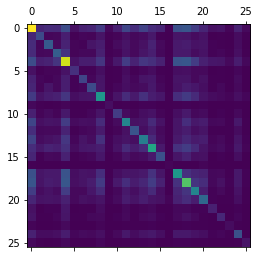

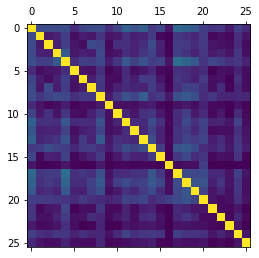

<AxesSubplot:>

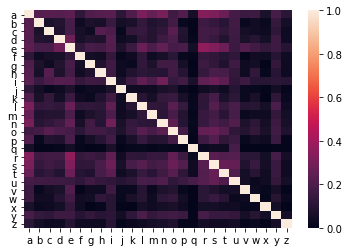

In [3]:
import matplotlib.pyplot as plt
plt.matshow(Z)
plt.show()


plt.matshow(C)
plt.show()

import seaborn as sns

# plot the heatmap
sns.heatmap(C, 
        xticklabels=C.columns,
        yticklabels=C.columns)

In [4]:
#cross hits of characters
let_hit =(let_hit/let_hit)
let_hit.iloc[let_hit.isna()] = 0
let_hit

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
aahed,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aalii,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aargh,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaron,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abaca,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zowie,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
zucco,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
zudda,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
zulus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [5]:
#Joint Probability 
#Note: does not account for repeat letters just binary yes/no
A=np.transpose(let_hit).dot(let_hit)
s = np.sum(np.sum(A))
J = A/s
J

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
a,0.021194,0.002553,0.003305,0.003167,0.006662,0.001217,0.002395,0.002831,0.004688,0.000559,...,0.000190,0.006413,0.006908,0.004732,0.002992,0.001199,0.001465,0.000377,0.002606,0.000646
b,0.002553,0.005662,0.000529,0.000678,0.002240,0.000143,0.000483,0.000436,0.001430,0.000137,...,0.000015,0.001641,0.001497,0.000971,0.001325,0.000094,0.000205,0.000073,0.000866,0.000149
c,0.003305,0.000529,0.007569,0.000737,0.002600,0.000330,0.000275,0.001606,0.002176,0.000067,...,0.000020,0.002015,0.002132,0.001377,0.001486,0.000281,0.000243,0.000099,0.000948,0.000108
d,0.003167,0.000678,0.000737,0.007718,0.003875,0.000386,0.000661,0.000611,0.002381,0.000123,...,0.000032,0.002038,0.001971,0.000974,0.001459,0.000339,0.000535,0.000170,0.001179,0.000123
e,0.006662,0.002240,0.002600,0.003875,0.019676,0.001258,0.002112,0.002190,0.004486,0.000383,...,0.000161,0.006510,0.006627,0.004571,0.002498,0.001492,0.001489,0.000626,0.002155,0.000579
f,0.001217,0.000143,0.000330,0.000386,0.001258,0.003261,0.000252,0.000231,0.000991,0.000029,...,0.000012,0.001053,0.001082,0.000708,0.000690,0.000035,0.000164,0.000076,0.000509,0.000079
g,0.002395,0.000483,0.000275,0.000661,0.002112,0.000252,0.005460,0.000521,0.001570,0.000085,...,0.000009,0.001532,0.001421,0.000787,0.001272,0.000164,0.000222,0.000018,0.000816,0.000099
h,0.002831,0.000436,0.001606,0.000611,0.002190,0.000231,0.000521,0.006501,0.001608,0.000088,...,0.000018,0.001451,0.002173,0.001714,0.001088,0.000158,0.000629,0.000050,0.000749,0.000105
i,0.004688,0.001430,0.002176,0.002381,0.004486,0.000991,0.001570,0.001608,0.013941,0.000287,...,0.000173,0.003746,0.004676,0.003308,0.001623,0.000953,0.000778,0.000389,0.001281,0.000459
j,0.000559,0.000137,0.000067,0.000123,0.000383,0.000029,0.000085,0.000088,0.000287,0.001088,...,0.000003,0.000190,0.000301,0.000132,0.000328,0.000053,0.000041,0.000012,0.000143,0.000018


In [8]:
np.sum(J)

a    0.098372
b    0.026087
c    0.035609
d    0.036156
e    0.091672
f    0.015170
g    0.025578
h    0.030556
i    0.065548
j    0.005062
k    0.022727
l    0.053510
m    0.032038
n    0.051703
o    0.063021
p    0.029266
q    0.001942
r    0.066758
s    0.079796
t    0.052858
u    0.044643
v    0.011634
w    0.015977
x    0.004925
y    0.033544
z    0.005849
dtype: float64

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
a,0.398299,0.001299,-0.006826,-0.012563,-0.101224,-1.015744e-02,-0.002583,-0.004846,-0.053988,0.002750,...,-0.000080,-6.370511e-03,-0.037464,-0.016174,-0.040204,0.001704,-0.003101,-0.002973,-0.021240,0.001263
b,0.001299,0.133998,-0.010185,-0.007533,-0.006888,-5.997929e-03,-0.005068,-0.008968,-0.006783,0.000104,...,-0.000769,-4.394171e-03,-0.016956,-0.011544,0.004518,-0.005103,-0.005069,-0.001406,0.001329,-0.000139
c,-0.006826,-0.010185,0.162655,-0.013858,-0.019890,-5.366007e-03,-0.015378,0.013399,-0.002228,-0.002627,...,-0.001066,-9.585234e-03,-0.020096,-0.013578,-0.001595,-0.003352,-0.007405,-0.001774,-0.005565,-0.002558
d,-0.012563,-0.007533,-0.013858,0.167908,0.014423,-4.688167e-03,-0.006726,-0.011770,0.002903,-0.001470,...,-0.000851,-1.031698e-02,-0.026474,-0.024298,-0.003363,-0.002013,-0.000866,-0.000298,0.000554,-0.002306
e,-0.101224,-0.006888,-0.019890,0.014423,0.390520,-6.008293e-03,-0.005768,-0.016032,-0.052767,-0.002277,...,-0.000384,1.431626e-02,-0.021311,-0.008648,-0.045230,0.012802,0.001960,0.005096,-0.026218,0.000235
f,-0.010157,-0.005998,-0.005366,-0.004688,-0.006008,8.781280e-02,-0.003285,-0.005631,-0.000068,-0.001083,...,-0.000302,6.551766e-07,-0.004612,-0.003631,0.001546,-0.003536,-0.001952,-0.000068,0.000121,-0.000306
g,-0.002583,-0.005068,-0.015378,-0.006726,-0.005768,-3.285276e-03,0.122067,-0.005768,-0.003041,-0.000915,...,-0.000893,-5.077401e-03,-0.016236,-0.015059,0.003005,-0.003186,-0.004146,-0.002431,0.000556,-0.001488
h,-0.004846,-0.008968,0.013399,-0.011770,-0.016032,-5.631393e-03,-0.005768,0.130570,-0.008610,-0.001442,...,-0.000876,-1.394391e-02,-0.006469,0.002384,-0.005482,-0.004522,0.003517,-0.002186,-0.006077,-0.001760
i,-0.053988,-0.006783,-0.002228,0.002903,-0.052767,-6.777526e-05,-0.003041,-0.008610,0.255204,-0.000923,...,0.001053,-1.558799e-02,-0.014818,-0.004362,-0.031279,0.005624,-0.006016,0.002330,-0.022836,0.002269
j,0.002750,0.000104,-0.002627,-0.001470,-0.002277,-1.083299e-03,-0.000915,-0.001442,-0.000923,0.023567,...,-0.000143,-3.297299e-03,-0.002727,-0.003201,0.002426,-0.000172,-0.000858,-0.000284,-0.000663,-0.000264


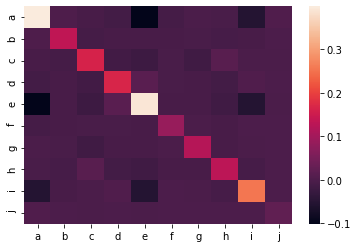

In [53]:
#Character Covariance
F = let_hit
mean = np.mean(F)
Fc = F-mean
V = np.transpose(Fc).dot(Fc)/(15918-1)
# plot the heatmap
m = 10
O = V.iloc[:m,:m]
sns.heatmap(O, 
        xticklabels=O.columns,
        yticklabels=O.columns)
V

In [60]:
#NMF Piece
n,m = Q.shape
k = 3
W = np.zeros((n,k))
H = np.zeros((k,m))